In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option("display.max.columns", None)
df = pd.read_pickle('12_tasks.pkl').dropna()


ModuleNotFoundError: No module named 'matplotlib'

# intro to matplotlib 

[Matplotlib](http://matplotlib.org/) is the most common charting package, see its [documentation](http://matplotlib.org/api/pyplot_api.html) for details, and its [examples](http://matplotlib.org/gallery.html#statistics) for inspiration.

### Setting Styles

We will use the `plt.style` function to set the appropriate aesthetic styles for all of our figures.
I am using the `ggplot` style, which ensures that the plots we create use the nice and calm design schemes

In [4]:
plt.style.use('ggplot')

## Object-oriented interface

The object-oriented interface is for when you want more control over your figure.
The object-oriented interface the plotting functions are *methods* of explicit `Figure` and `Axes` objects.

### Anatomy of a single plot figure¶


In [5]:
df.head(3).T

('info', 'user')                                               45312  \
task                  measure                                          
info                  device_type                            DESKTOP   
spatial_span          max_score                                  5.0   
                      avg_score                                 4.75   
                      avg_ms_per_item                     2052.07381   
                      num_correct                                4.0   
                      num_attempts                               7.0   
grammatical_reasoning final_score                               19.0   
                      num_errors                                 0.0   
                      num_correct                               19.0   
                      num_attempts                              19.0   
                      avg_ms_correct                     4078.842105   
double_trouble        final_score                               44.0   
                      pct_CC                                     1.0   
                      pct_CI                                     1.0   
                      pct_IC                                     1.0   
                      pct_II                                0.909091   
                      RT_CC                              1874.916667   
                      RT_CI                              1947.363636   
                      RT_IC                              1817.083333   
                      RT_II                              2055.636364   
                      num_errors                                 1.0   
                      num_correct                               45.0   
                      num_attempts                              46.0   
                      avg_ms_correct                     1898.155556   
odd_one_out           final_score                               14.0   
                      max                                       17.0   
                      num_errors                                 2.0   
                      num_correct                               16.0   
                      num_attempts                              18.0   
                      avg_ms_correct                        9761.875   
monkey_ladder         max_score                                  8.0   
                      avg_score                             5.555556   
                      avg_ms_per_item                    1604.177513   
                      num_correct                                9.0   
                      num_attempts                              12.0   
rotations             final_score                              109.0   
                      max                                       11.0   
                      correct_score                            116.0   
                      num_errors                                 0.0   
                      num_correct                               15.0   
                      num_attempts                              15.0   
                      avg_ms_correct                          5096.4   
feature_match         final_score                              100.0   
                      max                                       10.0   
                      correct_score                            109.0   
                      num_errors                                 0.0   
                      num_correct                               19.0   
                      num_attempts                              19.0   
                      avg_ms_correct                     3790.736842   
digit_span            max_score                                  5.0   
                      avg_score                             4.666667   
                      avg_ms_per_item                    1111.905556   
                      num_correct                                3.0   
                      num_attempts      

#### Create some data  

In [6]:
ooo_RT = ('odd_one_out','avg_ms_correct')
gr_RT = ('grammatical_reasoning','avg_ms_correct')
ds_RT = ('digit_span','avg_ms_per_item')

data = df[[ooo_RT,gr_RT,ds_RT]].astype(float).sample(200, random_state=42).round(2)
x,y1,y2 = data[ooo_RT],data[gr_RT],data[ds_RT]

#### Define a single plot object 

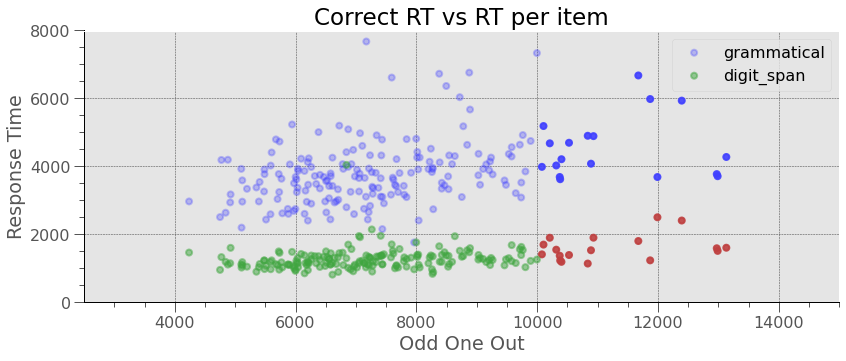

In [7]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LinearLocator
fig = plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(1, 1, 1, aspect=9/16)
c = ((x > 10000) | (y1 > 10000)).map({True :(0.25, 0.25, 1.00,0.9),
                                      False :(0.25, 0.25, 1.0,0.3)})
ax.scatter(x.to_numpy(), y1.to_numpy(), c=c, lw=2, zorder=10,label='grammatical')

c = ((x > 10000) | (y2 > 10000)).map({True :(0.75, 0.25, 0.25,0.9),
                                      False :(0.25, 0.65, 0.25,0.5)})
ax.scatter(x.to_numpy(), y2.to_numpy(), c=c, lw=2, zorder=10,label='digit_span')

ax.set_xlabel('odd_one_out'.replace('_',' ').title())
ax.set_ylabel('Response Time')



ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)


ax.set_ylim(0, 8000)
ax.set_xlim(2500, 15000)

ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('k')



ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.legend(loc="upper right")

ax.set_title('Correct RT vs RT per item');


### Saving Figures to File

- One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
- Saving a figure can be done using the `savefig()` command.


In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [9]:
fig.savefig('my_figure.png', bbox_inches = 'tight')

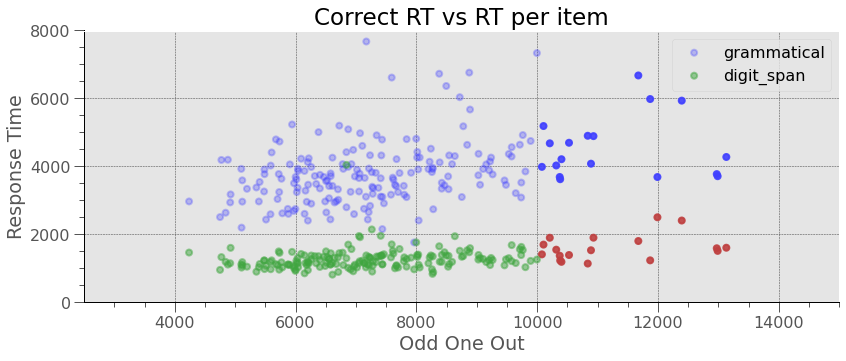

In [10]:
from IPython.display import Image
Image('my_figure.png')

### Anatomy of a multi column figure¶


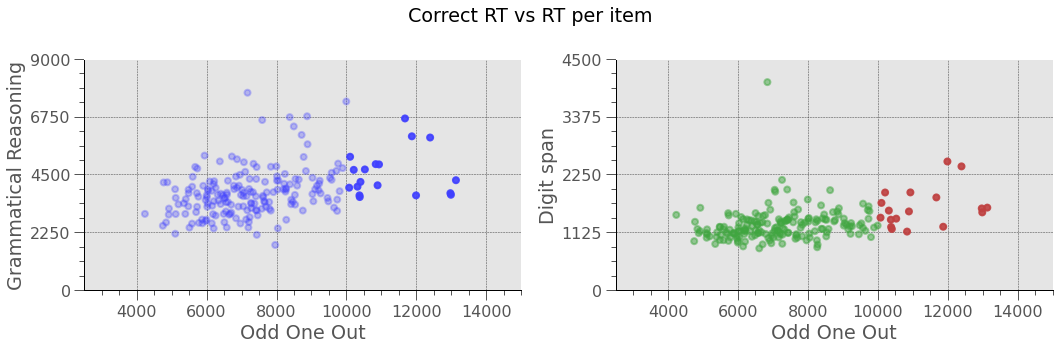

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

c = ((x > 10000) | (y1 > 10000)).map({True :(0.25, 0.25, 1.00,0.9),
                                      False :(0.25, 0.25, 1.0,0.3)})
ax[0].scatter(x.to_numpy(), y1.to_numpy(), c=c, lw=2, zorder=10,label='grammatical')

c = ((x > 10000) | (y2 > 10000)).map({True :(0.75, 0.25, 0.25,0.9),
                                      False :(0.25, 0.65, 0.25,0.5)})
ax[1].scatter(x.to_numpy(), y2.to_numpy(), c=c, lw=2, zorder=10,label='digit_span')


for a in ax:
    
    a.set_xlabel('odd_one_out'.replace('_',' ').title())
    a.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
    a.set_xlim(2500, 15000)
    a.xaxis.set_major_locator(MultipleLocator(2000))
    a.xaxis.set_minor_locator(AutoMinorLocator(4))
    a.yaxis.set_major_locator(LinearLocator(5))
    a.yaxis.set_minor_locator(AutoMinorLocator(4))
    a.spines[['bottom', 'left']].set_visible(True)
    a.spines[['bottom', 'left']].set_color('k')
    a.tick_params(which='major', width=1.0)
    a.tick_params(which='major', length=10)
    a.tick_params(which='minor', width=1.0, labelsize=10)
    a.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax[0].set_ylim(0, 9000)
ax[1].set_ylim(0, 4500)
ax[0].set_ylabel('Grammatical Reasoning');
ax[1].set_ylabel('Digit span');

fig.suptitle('Correct RT vs RT per item');

plt.tight_layout()



### We can create helper functions to make our plots consistent in style



In [12]:
def change_style(ax,xlim=None, ylim=None, xlabel='X label', ylabel='Y label'):

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

    if type(ylim) is list:
        ax.set_ylim(*ylim)
    if type(xlim) is list:
        ax.set_xlim(*xlim)
    
    ax.xaxis.set_major_locator(LinearLocator(5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_major_locator(LinearLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.spines[['bottom', 'left']].set_visible(True)
    ax.spines[['bottom', 'left']].set_color('k')
    
    ax.tick_params(which='major', width=1.0)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', width=1.0, labelsize=10)
    ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

### Anatomy of a multi panel figure¶


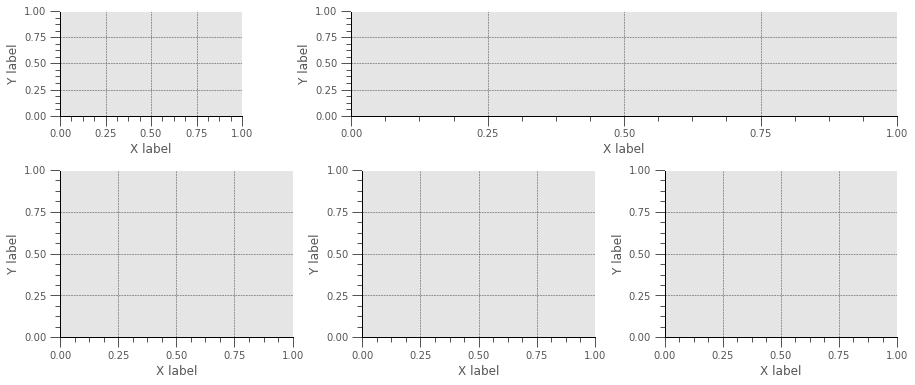

In [13]:
fig = plt.figure(figsize=(15, 6), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, height_ratios=[1.25, 2])
gs1 = gs[0].subgridspec(1, 2, width_ratios=[1, 3],wspace=0.3)
gs2 = gs[1].subgridspec(ncols=3, nrows=1,wspace=0.3)
plt.rcParams.update({'font.size': 10})

a1 = fig.add_subplot(gs1[0])
a2 = fig.add_subplot(gs1[1])
a3 = fig.add_subplot(gs2[0])
a4 = fig.add_subplot(gs2[1])
a5 = fig.add_subplot(gs2[2])
for a in [a1,a2,a3,a4,a5]:
    change_style(a)
fig.subplots_adjust(hspace=0.4)


### Often we would like to add letters per panel

In [14]:
def add_panel_letter(fig, ax, letter ,pos=( 0, 1.05), fontsize=12):
    ax.text(*pos, 
            letter, 
            ha='left',
            fontsize=fontsize,
            fontweight='bold', 
            transform=ax.transAxes)
    

### Finally this framework is limited by your imagination

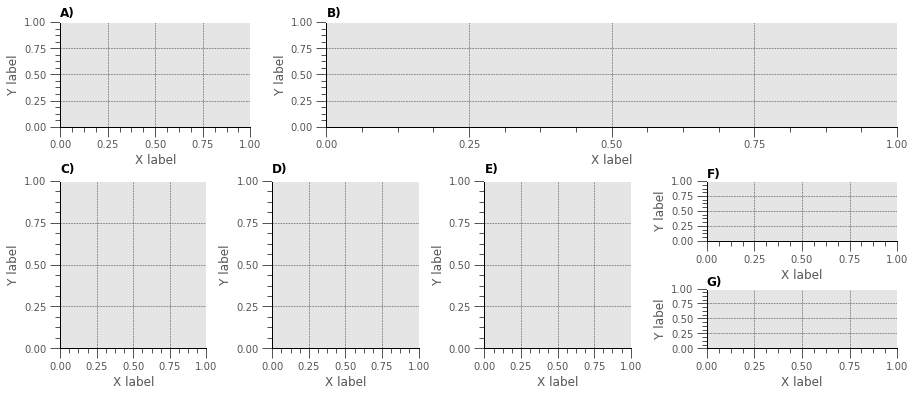

In [15]:
rng = np.random.default_rng(2022)
fig = plt.figure(figsize=(15, 6), constrained_layout=True)
gs = fig.add_gridspec(nrows=2,ncols=2, height_ratios=[1.25, 2],width_ratios=[3, 1])
gs1 = gs[0,:].subgridspec(1, 2, width_ratios=[1, 3],wspace=0.2)
gs2 = gs[1,0].subgridspec(ncols=3, nrows=1,wspace=0.45)
gs3 = gs[1,1].subgridspec(nrows=2,ncols=1 ,hspace=0.8)
plt.rcParams.update({'font.size': 10})

a1 = fig.add_subplot(gs1[0])
a2 = fig.add_subplot(gs1[1])
a3 = fig.add_subplot(gs2[0])
a4 = fig.add_subplot(gs2[1])
a5 = fig.add_subplot(gs2[2])
a6 = fig.add_subplot(gs3[0])
a7 = fig.add_subplot(gs3[1])
for i,a in enumerate([a1,a2,a3,a4,a5,a6,a7]):
    xlim = rng.integers(5,100,size=1)*[0,1]
    ylim = rng.integers(5,100,size=1)*[0,1]
    change_style(a,xlim=xlim,ylim=ylim)
    add_panel_letter(fig,a,f'{chr(65+i)})')
fig.subplots_adjust(hspace=0.4)

## Links to expand your understanding 

- [Anatomy of a figure](https://matplotlib.org/3.5.0/gallery/showcase/anatomy.html)